## Car Sales Price Range Estimation

Name : Karishma Saikia

### [1.INTRODUCTION](#INTRODUCTION)
    - Background
    - Data Description
    - Problem Statement

###  Background

This data is downloaded from carsale.com.au. It contains information on used as well as new cars in Australia. It has around 60K observations and 13 variables which has different information on cars based on which price can be estimated. 

###  Problem Statement

How accurately can we estimate the price range of the used as well as new cars based on available information?

###  Data Description

It has 55.9K rows and following features-

- id : the number of each record
- brand : the brand of the car
- model : the model of the car
- title : a comprehensive description of the car
- price : the price that of the car in Australian dollar
- discount : the discount included in the price. The rego of Aus is about 800AUD, so this column includes the option of whether this car is still under insurance.
- odometre : how many km the car has ran
- body : the type of a car
- transmission : Manual or Automatic
- engine : the type of the engine
- state : where the car is being sold
- seller : the type of seller
- year : which year the car has been manufactured. This column is extracted from the title with the none-labeled title filled 2000


### [1. DATA CLEANING](#DATA-CLEANING)
- Deleted missing Values
- Renamed/Replaced Columns
- Removed outliers
- Rearranged column outliers

### [2. EXPLORATORY DATA ANALYSIS](#EXPLORATORY-DATA-ANALYSIS)
- Explored the required columns 
- Bar plots
- Distribution plots
- Correlation plot
- Pie Charts

### [3. FEATURE ENGINEERING](#FEATURE-ENGINEERING)
- Grouping price into bins
- Encoding
- Feature selection
- SMOTE

### [4. IMPLEMENT KNN ](#IMPLEMENT-KNN)
- Optimized model parameters
- Confusion & Correlation Matrix


### [5. IMPLEMENT RANDOM FOREST](#IMPLEMENT-RANDOM-FOREST)
- Optimized model parameters
- Confusion & Correlation Matrix


### [6. IMPLEMENT GRADIENT BOOSTING](#IMPLEMENT-GRADIENT-BOOSTING)
- Optimized model parameters
- Confusion & Correlation Matrix

### [7. IMPLEMENT DEEP LEARNING](#IMPLEMENT-DEEP-LEARNING)
- Data preprocessing
- Accuracy Measures

### [8. CONCLUSION](#CONCLUSION)

Importing the required packages

In [225]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib



from scipy.stats import boxcox #For data normalization
from sklearn.preprocessing import LabelEncoder #data transformation
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV)
from sklearn import metrics

import warnings
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

from imblearn.over_sampling import SMOTE


from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

# %matplotlib inline

warnings.filterwarnings('ignore')



In [226]:
raw_df=pd.read_csv('car_price.csv')
print(raw_df.shape)
raw_df.head()

(55870, 13)


,id,brand,model,title,price,discount,odometres,body,transmission,engine,state,seller,year
0,1,honda,accord,2010 Honda Accord VTi Auto,13990.0,Excl. Govt. Charges,54830,Sedan,Automatic,4cyl 2.4L Petrol,SA,Used Car,2010
1,2,honda,accord,2007 Honda Accord VTi-L Auto,5900.0,None,180000,Sedan,Automatic,4cyl 2.4L Petrol,VIC,Private Seller Car,2007
2,3,honda,accord,2008 Honda Accord VTi-L Auto,8750.0,None,112918,Sedan,Automatic,4cyl 2.4L Petrol,NSW,Private Seller Car,2008
3,4,honda,accord,2013 Honda Accord V6L Auto,22900.0,None,85413,Sedan,Automatic,6cyl 3.5L Petrol,QLD,Private Seller Car,2013
4,5,honda,accord,2013 Honda Accord VTi-L Auto,18888.0,Excl. Govt. Charges,76767,Sedan,Automatic,4cyl 2.4L Petrol,WA,Used Car,2013


### DATA CLEANING

**Check for NULL values and drop accordingly**

In [227]:
print(raw_df.count())
raw_df=raw_df.dropna()
print(raw_df.count())

id              55870
brand           55870
model           55870
title           55870
price           55326
discount        55870
odometres       55870
body            55810
transmission    55810
engine          55810
state           55870
seller          55870
year            55870
dtype: int64
id              55266
brand           55266
model           55266
title           55266
price           55266
discount        55266
odometres       55266
body            55266
transmission    55266
engine          55266
state           55266
seller          55266
year            55266
dtype: int64


Only 1% of total data contains NA, so these are dropped.

Let us check the price column if there are any outliers

Text(0.5,1,'Box Plot for Price Column')

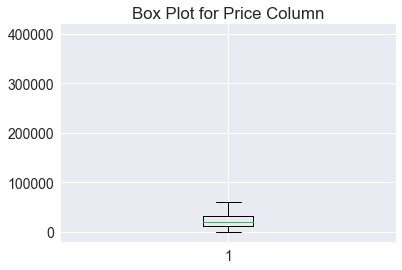

In [228]:
plt.boxplot(x=raw_df['price'], notch=False, vert=True, whis=1.5,
        positions=None, widths=None, patch_artist=False,
        bootstrap=None, usermedians=None, conf_intervals=None, showfliers=True)
matplotlib.rcParams.update({'font.size': 12})
plt.title('Box Plot for Price Column')

I want to see which type of cars fall under outliers as there can be cases, where the prices of cars are really high.

Text(0,0.5,'The count')

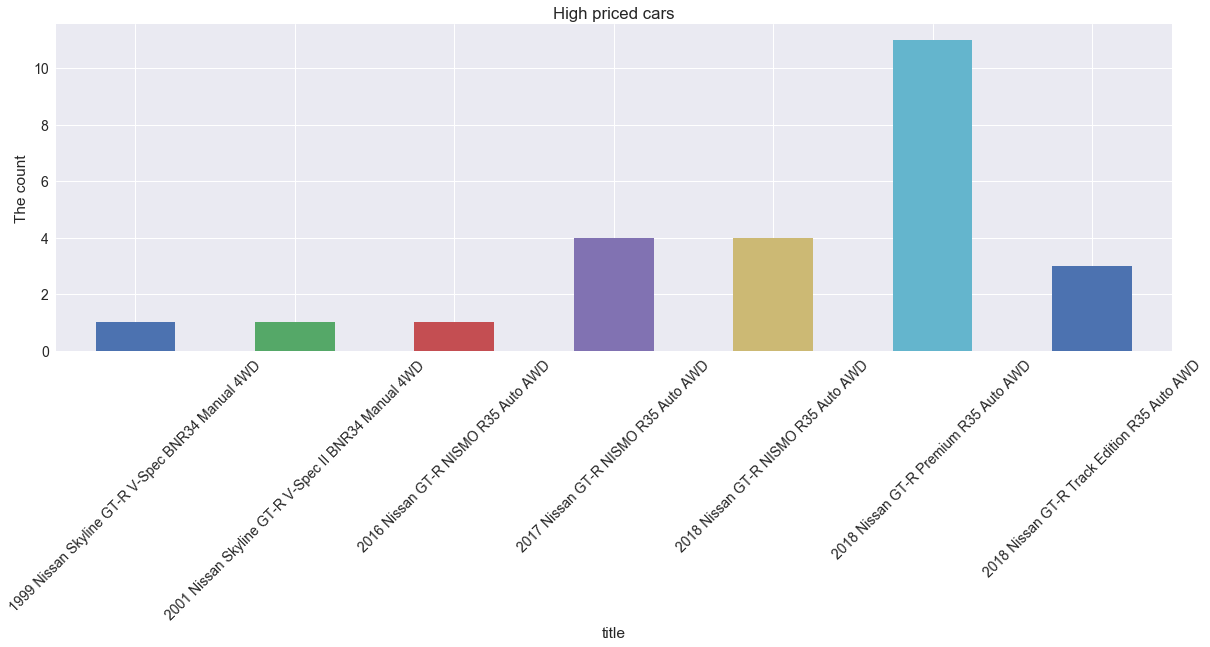

In [229]:

plt.figure(figsize=(20,6))
matplotlib.rcParams.update({'font.size': 14})
data_outliers=raw_df[raw_df.price> 200000]
data_outliers.groupby(['title']).count()['id'].plot(kind='bar')
# matplotlib.rc('xtick', labelsize=20) 
plt.xticks(rotation= 45)

plt.title('High priced cars')
plt.ylabel('The count')

After some google search, most expensive Nissan car is around 251370 Australian dollars. So, removing all the rows with price above 260000, <br>
Also, removing the prices below 1000 as it is suspicious for the price to be below 1000 <br>

The count of data I will lose with the above filtering is 100

In [230]:
raw_df=raw_df[raw_df.price< 260000]
raw_df=raw_df[raw_df.price> 1000]

In [231]:
raw_df.count()

id              55188
brand           55188
model           55188
title           55188
price           55188
discount        55188
odometres       55188
body            55188
transmission    55188
engine          55188
state           55188
seller          55188
year            55188
dtype: int64

Let us inspect the unique values for each column and its count

In [232]:
raw_df.engine.value_counts()
raw_df.model.value_counts();
raw_df.body.value_counts();
raw_df.transmission.value_counts();
raw_df.seller.value_counts();
raw_df.year.value_counts();

The data is very unclean.<br>
From above analysis, need to perform the following-

- *Body* column contains information on transmission type, its type of body and some other irrelevant information. 
- *Transmission* column contains information on transmission and also some information from *engine* column.
- Even *engine* column is unclean with information from other columns.
- Need to merge the columns with similar information and delete the others.

In [233]:
car_df=raw_df.copy()
x=[]
y=[]

#make a new column with transmission type by extracting from "body" and "transmission"

for index, row in car_df.iterrows():
    if ((row['body']=='Automatic') or (row['body']=='Manual')):
        
        x.append(row['body'])
    elif ((row['transmission']=='Automatic') or ( row['transmission']=='Manual')):
        x.append(row['transmission'])

In [234]:
for index, row in car_df.iterrows():
    
    if "cyl" in row['transmission']:
        y.append(row['transmission'])
    elif "cyl" in row['engine']:
        y.append(row['engine'])
        
car_df['engine_type']=y
car_df['transmission_type']=x

car_df.head(2)

,id,brand,model,title,price,discount,odometres,body,transmission,engine,state,seller,year,engine_type,transmission_type
0,1,honda,accord,2010 Honda Accord VTi Auto,13990.0,Excl. Govt. Charges,54830,Sedan,Automatic,4cyl 2.4L Petrol,SA,Used Car,2010,4cyl 2.4L Petrol,Automatic
1,2,honda,accord,2007 Honda Accord VTi-L Auto,5900.0,None,180000,Sedan,Automatic,4cyl 2.4L Petrol,VIC,Private Seller Car,2007,4cyl 2.4L Petrol,Automatic


In [235]:
car_df.count();

Let us split the *engine type* column to number of cylinders, its capacity and type of fuel

In [236]:
car_df['number_cyl'], car_df['capacity'] = car_df['engine_type'].str.split(' ', 1).str
car_df['capacity_litres'], car_df['fuel_type'] = car_df['capacity'].str.split(' ', 1).str
car_df.head(2)


,id,brand,model,title,price,discount,odometres,body,transmission,engine,state,seller,year,engine_type,transmission_type,number_cyl,capacity,capacity_litres,fuel_type
0,1,honda,accord,2010 Honda Accord VTi Auto,13990.0,Excl. Govt. Charges,54830,Sedan,Automatic,4cyl 2.4L Petrol,SA,Used Car,2010,4cyl 2.4L Petrol,Automatic,4cyl,2.4L Petrol,2.4L,Petrol
1,2,honda,accord,2007 Honda Accord VTi-L Auto,5900.0,None,180000,Sedan,Automatic,4cyl 2.4L Petrol,VIC,Private Seller Car,2007,4cyl 2.4L Petrol,Automatic,4cyl,2.4L Petrol,2.4L,Petrol


In [237]:
car_df=car_df.dropna();
car_df['fuel_type'].value_counts()


Petrol          37076
Turbo Diesel    15584
Turbo Petrol     1999
Diesel            418
                   77
S Petrol           34
Name: fuel_type, dtype: int64

In 77 of the cars, fuel type is not mentioned. So, deleting the same

In [238]:
car_df['fuel_type'].replace('', np.nan, inplace=True)
car_df.dropna(subset=['fuel_type'], inplace=True)

Removing the extensions from newly created columns

In [239]:
try:
    car_df['number_cyl'] = car_df['number_cyl'].str.replace('cyl', '')
except:
    print("Already replaced")

try:
    car_df['capacity_litres'] = car_df['capacity_litres'].str.replace('L', '')
except:
    print("',' Already replaced")

Filtering the newly created columns

In [240]:
car_df_clean=car_df[["brand","odometres","state","seller","year","transmission_type",
                     "number_cyl","capacity_litres","fuel_type","price"]]

Checking the data types of the columns

In [241]:
car_df_clean.dtypes

brand                 object
odometres              int64
state                 object
seller                object
year                   int64
transmission_type     object
number_cyl            object
capacity_litres       object
fuel_type             object
price                float64
dtype: object

In [242]:
car_df_clean.describe()

,odometres,year,price
count,55111.000000,55111.000000,55111.000000
mean,97787.023135,2011.974687,24581.419662
std,86845.497878,5.364310,16920.168969
min,0.000000,1968.000000,1050.000000
25%,27608.000000,2009.000000,12700.000000
50%,82000.000000,2013.000000,20990.000000
75%,146640.500000,2016.000000,32000.000000
max,999999.000000,2018.000000,250000.000000


In [243]:
#Found this bug while converting the data types, so removing the same
try:
    car_df_clean=car_df_clean[car_df_clean['capacity_litres'] != '13B']
except:
    print("Already done")



Changing the data type of the numerical columns

In [244]:
car_df_clean['capacity_litres'] = car_df_clean['capacity_litres'].astype(float)
car_df_clean['number_cyl'] = car_df_clean['number_cyl'].astype(float)

Checking the unique values for these new columns

In [245]:
car_df_clean['number_cyl'].value_counts();
car_df_clean['capacity_litres'].value_counts();

In [246]:
car_df_clean[car_df_clean.capacity_litres> 7]

,brand,odometres,state,seller,year,transmission_type,number_cyl,capacity_litres,fuel_type,price
34814,toyota,76000,NSW,Private Seller Car,1976,Manual,4.0,2000.0,Petrol,39000.0
34822,toyota,77000,VIC,Private Seller Car,1976,Automatic,4.0,2000.0,Petrol,18999.0
34827,toyota,63500,VIC,Private Seller Car,1977,Automatic,4.0,2000.0,Petrol,13200.0
34858,toyota,1,NSW,Private Seller Car,1976,Manual,4.0,2000.0,Petrol,20000.0
36750,toyota,70000,VIC,Private Seller Car,1976,Manual,4.0,1200.0,Petrol,9500.0
37043,toyota,118000,NSW,Private Seller Car,1978,Manual,4.0,1200.0,Petrol,9000.0
37709,toyota,240000,QLD,Private Seller Car,1976,Automatic,4.0,1200.0,Petrol,3000.0
39164,toyota,735000,VIC,Private Seller Car,1975,Manual,4.0,1600.0,Petrol,19999.0
39882,toyota,200000,NSW,Private Seller Car,1979,Manual,4.0,1600.0,Petrol,4500.0


Clearly these are outliers. Removing them from our dataset

In [247]:
car_df_clean=car_df_clean[car_df_clean.capacity_litres< 7]

### EXPLORATORY DATA ANALYSIS

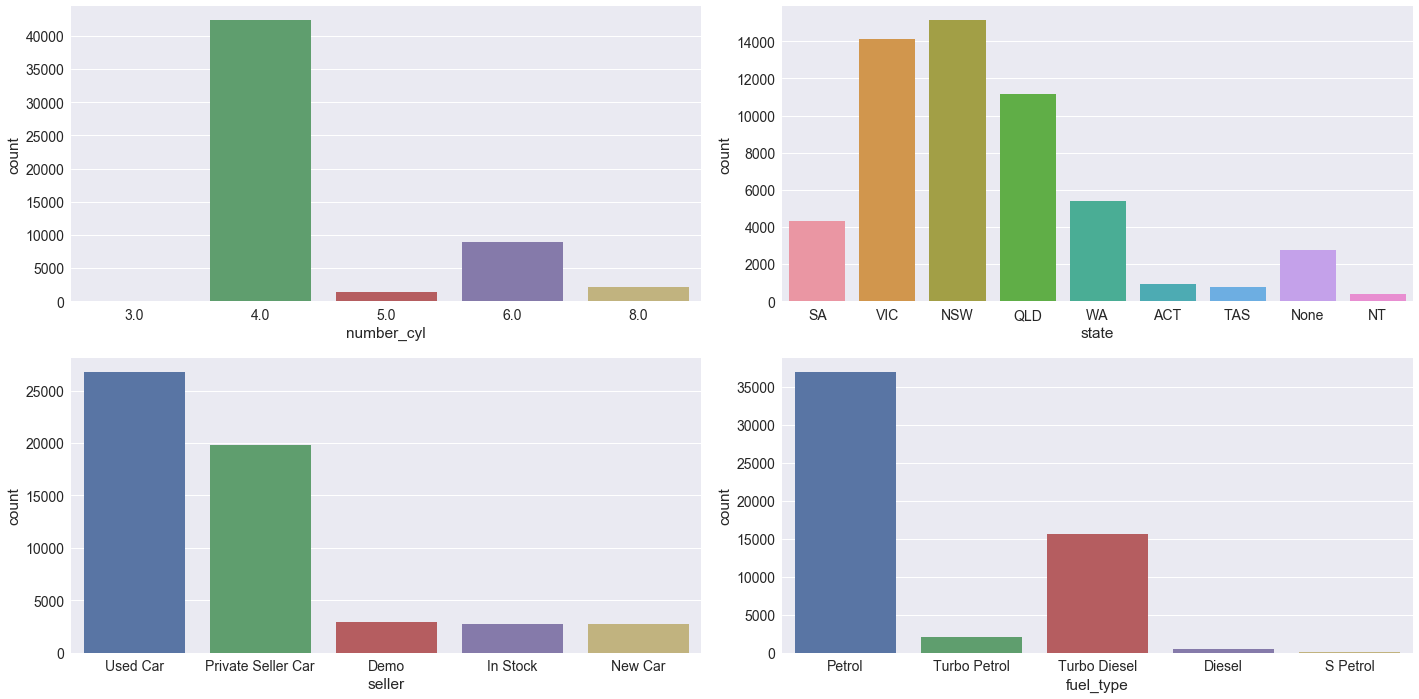

In [248]:
bar_columns=['number_cyl','state','seller',
                     "fuel_type"]


plt.figure(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 16})
for i, feature in enumerate(bar_columns):
    rows = int(len(bar_columns)/2)
    
    plt.subplot(rows, 2, i+1)
    
    sns.countplot(car_df_clean[feature]);
    sns.countplot(car_df_clean[feature]);
    
#     plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

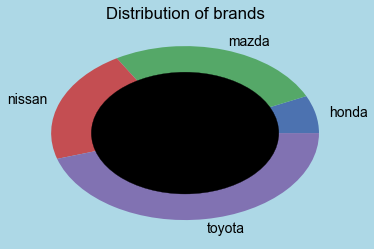

In [249]:
year_df=pd.DataFrame(car_df_clean.groupby('brand').count()['seller']).reset_index()
size=year_df.seller
labels=year_df.brand
 
fig = plt.figure()
fig.patch.set_facecolor('lightblue')
 
plt.rcParams['text.color'] = 'black'
 
my_circle=plt.Circle( (0,0), 0.7, color='black')
 
plt.pie(size, labels=labels)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of brands")
plt.show()

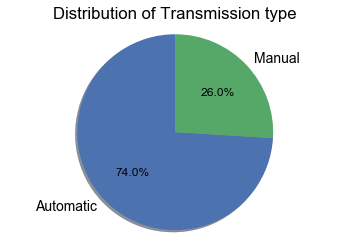

In [250]:
pie_df=pd.DataFrame(car_df_clean.groupby('transmission_type').count()['seller']).reset_index()
size=pie_df.seller
labels=pie_df.transmission_type

matplotlib.rcParams.update({'font.size': 12})
fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of Transmission type")
plt.show()

Some plots for numerical columns

Text(0.5,1,"Distribution of car's capacity in Litres")

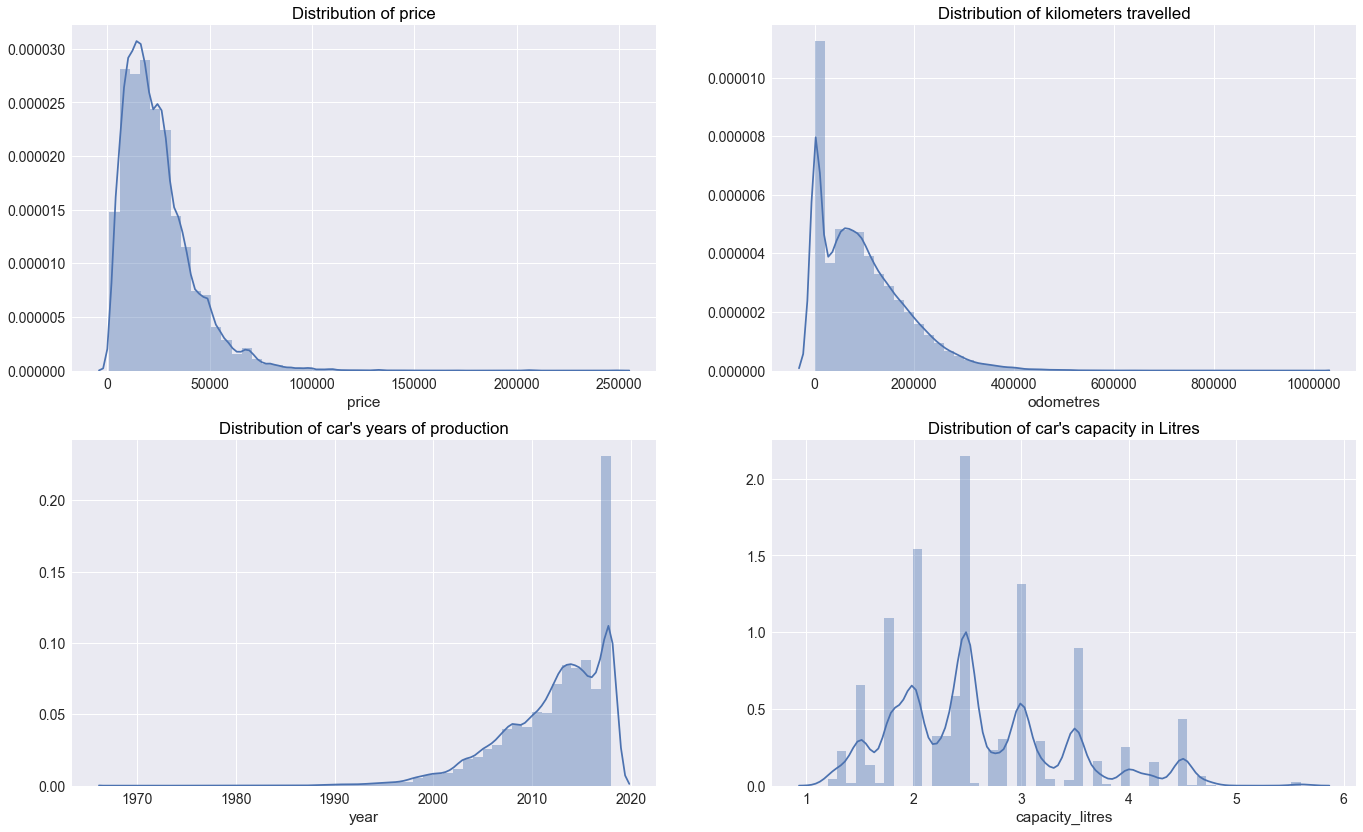

In [251]:
plt.figure(figsize=(23,14))
matplotlib.rcParams.update({'font.size': 14})

plt.subplot(2,2,1)
ax=sns.distplot(car_df_clean.price)
ax.set_title("Distribution of price")

plt.subplot(2,2,2)
ax=sns.distplot(car_df_clean.odometres)
ax.set_title("Distribution of kilometers travelled")

plt.subplot(2,2,3)
ax=sns.distplot(car_df_clean.year)
ax.set_title("Distribution of car's years of production")

plt.subplot(2,2,4)
ax=sns.distplot(car_df_clean.capacity_litres)
ax.set_title("Distribution of car's capacity in Litres")


Let us find out some correlations with price for different variables

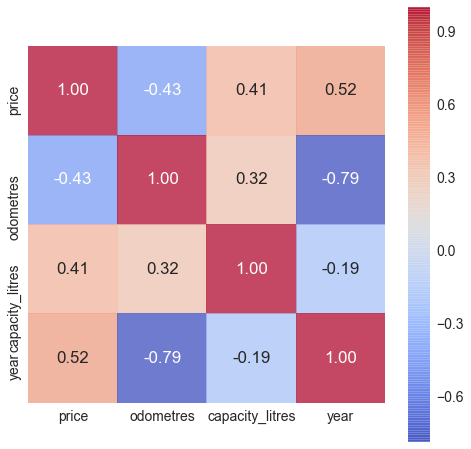

In [252]:
num_columns=['price','odometres','capacity_litres','year']

corr = car_df_clean[num_columns].corr()
plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
# annot_kws={'size': 15}
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',
           xticklabels= num_columns, yticklabels= num_columns, alpha = 0.7,  cmap= 'coolwarm')
# matplotlib.rcParams.update({'font.size': 16})
# png("S7.png", width=1000, height=1000)
plt.show()
plt.savefig('corr.png')

None of the variables are highly correlated. This means we can go ahead with the analysis without dropping any columns.

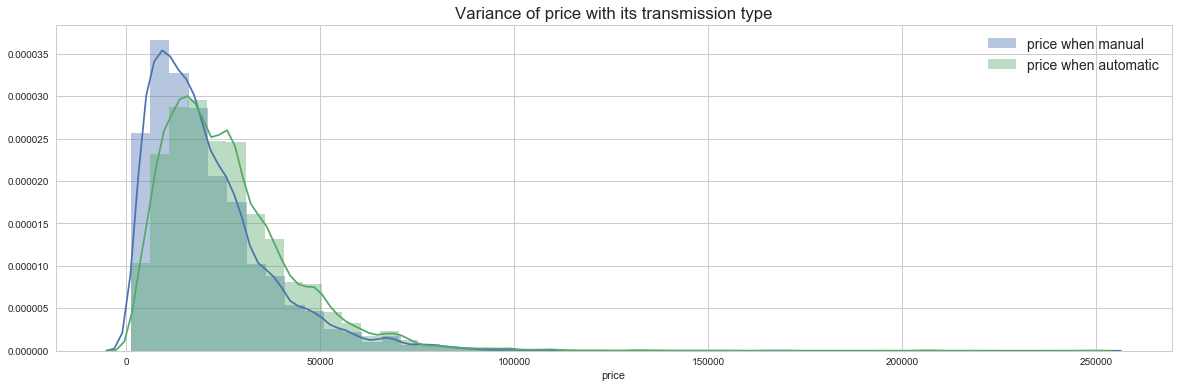

In [253]:
data0 = car_df_clean.loc[car_df_clean['transmission_type'] == 'Manual', 'price']
data1 = car_df_clean.loc[car_df_clean['transmission_type'] == 'Automatic', 'price']

sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
# matplotlib.rcParams.update({'font.size': 16})


sns.set(style='whitegrid')
sns.distplot(data0, hist=True, label="price when manual")
sns.distplot(data1, hist=True, label="price when automatic")
sns.set(font_scale=1.4)
plt.title("Variance of price with its transmission type")
plt.legend()



### FEATURE ENGINEERING

From above plot, We can see that the depedent variable is positively skewed. Let us apply Box-Cox transformation and see the results

In [254]:
df=car_df_clean.copy()

In [255]:
df['price'].min();

In [256]:
df.count();

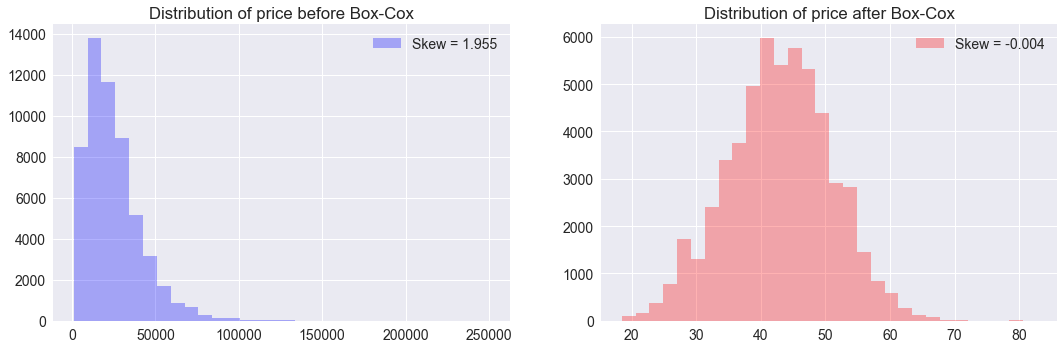

In [257]:
df_bc, m =boxcox(df['price']) 
df_bc=pd.Series(df_bc)

plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
ax=plt.hist(df['price'], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df['price'].skew(),3))) )
plt.title("Distribution of price before Box-Cox")
plt.legend(loc='upper right')

plt.subplot(2,2,2)
ax=plt.hist(df_bc, color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc.skew(),3))) )
plt.title("Distribution of price after Box-Cox")
plt.legend(loc='upper right')


The Box-Cox transform seems to do a good job in reducing the skew. However, I will be grouping the prices into bins. If required, I can use these normalized transformation

**Let us encode the categorical variables with label encoder**

**Grouping price values into bins**

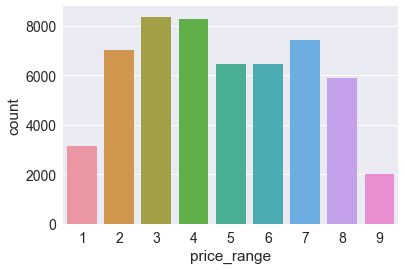

In [258]:
bins = [0,5000,10000, 15000,20000,25000,30000,40000,60000,250000]
group_names=[1,2,3,4,5,6,7,8,9]
df['price_range']=pd.cut(df["price"], bins, labels=group_names);
sns.countplot(df['price_range'])

I have decided to not include *state* and *seller* variable in independent variables as the information in that columns is not very clear to derive any conclusion

In [259]:
df['price_range'].count();

In [260]:
df['price_range'].value_counts()

3    8363
4    8256
7    7434
2    7002
5    6458
6    6446
8    5898
1    3139
9    1999
Name: price_range, dtype: int64

In [261]:
df=df[['brand', 'odometres', 'year', 'transmission_type',
       'number_cyl', 'capacity_litres', 'fuel_type', 'price_range']]


In [262]:
df['price_range'].value_counts();

In [263]:
df['price_range'] = df['price_range'].astype(int)
df.dtypes

brand                 object
odometres              int64
year                   int64
transmission_type     object
number_cyl           float64
capacity_litres      float64
fuel_type             object
price_range            int32
dtype: object

In [264]:
df_keras=df.copy()

**Encoding the dependent and independent variables**

In [265]:
lb = LabelEncoder() 
df['brand'] = lb.fit_transform(df['brand'] ) 
df['transmission_type'] = lb.fit_transform(df['transmission_type'] ) 
df['fuel_type'] = lb.fit_transform(df['fuel_type'] )
# df['price_range'] = lb.fit_transform(df['price_range'] ) 

In [266]:
df.count()

brand                54995
odometres            54995
year                 54995
transmission_type    54995
number_cyl           54995
capacity_litres      54995
fuel_type            54995
price_range          54995
dtype: int64

**Splitting X and y into Train and Test and applying SMOTE**

In [267]:
X = df.iloc[:,0:7]
y = df['price_range'] 
seed=7

In [268]:
cust = SMOTE(random_state=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
columns = X_train.columns
Smote_train_X,Smote_train_y=cust.fit_sample(X_train, y_train)
print("length of oversampled data is ",len(Smote_train_X))

length of oversampled data is  59886


We can see the size of the dataset increased with synthetic samples

Text(0.5,1,'Distribution after SMOTE application')

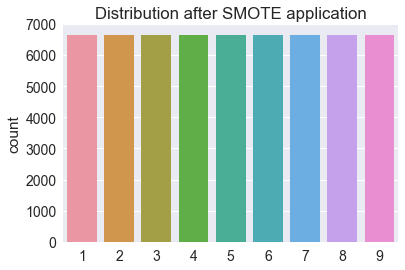

In [269]:
sns.countplot(Smote_train_y)
plt.title("Distribution after SMOTE application")

### MACHINE LEARNING MODELS

In [270]:
#Approximately square root of the number of observations for KNN
import math
math.sqrt(len(df))

234.51012771306915

Using Pipeline with four classifier models to get an overview of its performance. <br>
Used 10 fold cross validation and calculated the cross validation score, standard deviation and time taken to perform the task

In [171]:
pipelines = []
n_estimators = 50
n_neighbors=235

pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier(n_neighbors=n_neighbors)) ])))

pipelines.append( ('RF',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('RF', RandomForestClassifier(n_estimators=n_estimators,random_state=seed)) ]) ))

pipelines.append( ('NB',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('NB', GaussianNB()) ]) ))

pipelines.append( ('GB',
                   Pipeline([ 
                             ('sc', StandardScaler()),
                             ('GB', GradientBoostingClassifier(random_state=seed)) ]) ))



results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds)
    cv_results = cross_val_score(model, Smote_train_X, Smote_train_y, cv=kfold, scoring = scoring,
                                n_jobs=-1) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


KNN: 58.518095 (+/- 0.831742) performed in 19.213177 seconds
RF: 62.168532 (+/- 3.961468) performed in 31.986044 seconds
NB: 40.241444 (+/- 0.680292) performed in 0.654509 seconds
GB: 61.559610 (+/- 1.987120) performed in 413.125269 seconds


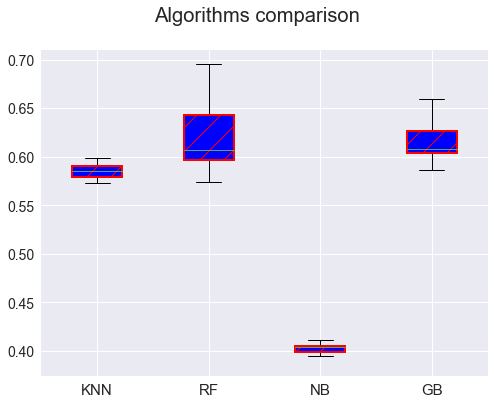

In [172]:
fig = plt.figure(figsize=(8,6))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
bp0=plt.boxplot(results, patch_artist=True)
ax.set_xticklabels(names, size=15)


for box in bp0['boxes']:
    box.set(color='red', linewidth=2)
    box.set(facecolor = 'blue' )
    box.set(hatch = '/')
plt.show()

Score for Naive Bayes is very poor. So, this model is rejected. <br>
Let me tune parameters for KNN and RF and recheck its performance. And also check performance of Gradient Boosting model by tuning some of the parameters.

** Defining a function to print Confusion Matrix**

In [173]:
def print_confusion_matrix(confusion_matrix, class_names, name,figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.title(f"Confusion matrix for {name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig
classname = ["1","2","3","4","5","6","7","8","9"]

### IMPLEMENT KNN

**Optimum parameter for KNN is derived and re evaluated its performance**

Text(0,0.5,'Mean Error')

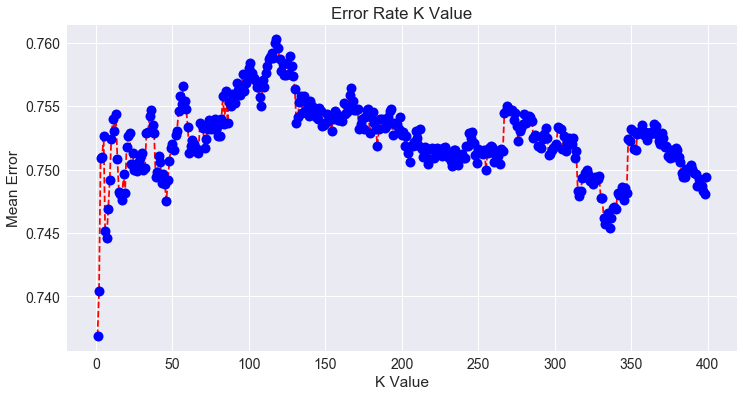

In [174]:
error = []

# Calculating error for K values between 1 and 400
for i in range(1, 400):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Smote_train_X, Smote_train_y)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 400), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

From above plot, we can see that minimum value of is around 330-340. Let me try with all the numbers between 330 and 340

              precision    recall  f1-score   support

           1       0.22      0.76      0.34       620
           2       0.24      0.37      0.29      1345
           3       0.23      0.19      0.21      1709
           4       0.23      0.24      0.24      1674
           5       0.19      0.17      0.18      1293
           6       0.34      0.11      0.17      1339
           7       0.36      0.21      0.27      1457
           8       0.40      0.26      0.31      1173
           9       0.24      0.32      0.27       389

    accuracy                           0.25     10999
   macro avg       0.27      0.29      0.25     10999
weighted avg       0.28      0.25      0.24     10999



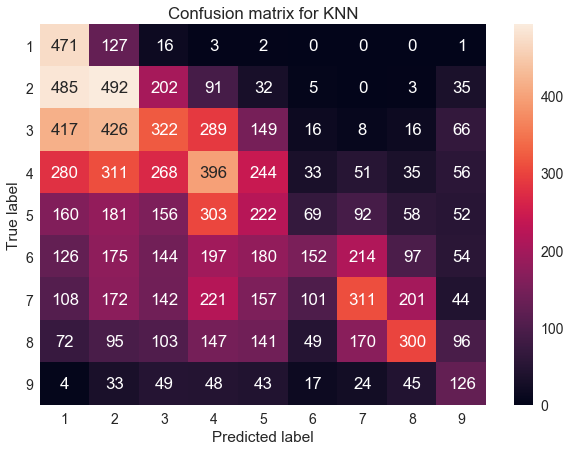

In [177]:
from sklearn.metrics import classification_report, confusion_matrix 
classifier = KNeighborsClassifier(n_neighbors=337)  
classifier.fit(Smote_train_X, Smote_train_y)  

y_pred = classifier.predict(X_test) 
confusion_matrix=confusion_matrix(y_test, y_pred)


print(classification_report(y_test, y_pred))
print_confusion_matrix(confusion_matrix, classname, "KNN");

The results are not good.The F1 score, Recall and Precision scores are below 30% which is very less. This model cannot be used to predict the price range.

### IMPLEMENT RANDOM FOREST

**Grid Search for optimum parameters of Random Forest Algorithm and then training with optimized model**


In [178]:
clf=RandomForestClassifier()
param_grid = { 
    'n_estimators': [100, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(Smote_train_X, Smote_train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [180]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 400}

**Predicting with best parameters**

              precision    recall  f1-score   support

           1       0.68      0.84      0.75       620
           2       0.66      0.65      0.65      1345
           3       0.59      0.63      0.61      1709
           4       0.53      0.47      0.50      1674
           5       0.41      0.47      0.44      1293
           6       0.44      0.34      0.38      1339
           7       0.52      0.53      0.52      1457
           8       0.67      0.64      0.66      1173
           9       0.68      0.80      0.74       389

    accuracy                           0.56     10999
   macro avg       0.58      0.60      0.58     10999
weighted avg       0.56      0.56      0.56     10999



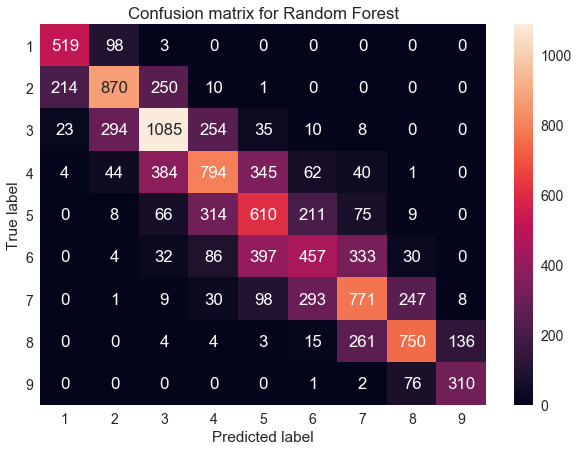

In [181]:
y_pred=CV_rfc.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,5))

print_confusion_matrix(confusion_matrix, classname, "Random Forest");
print(classification_report(y_test, y_pred))

Well the performance is much better than KNN. It predicted pretty well for lower price ranges for 1,2 and 3. The F1, Recall and Precision scores have improved by almost 30% as compared to KNN. Although the scores increased and there are more instances of True predictions, but it is still below 70-80%, because of which we cannot accept the model.

### IMPLEMENT GRADIENT BOOSTING

Trained with different learning rates to derive the optimum learning rate and fixing the other parameters by applying thumb rule which is calculated based on number of observations and features

In [189]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=40, learning_rate = learning_rate, max_features=2, max_depth = 8, random_state = 7)
    gb.fit(Smote_train_X, Smote_train_y)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(Smote_train_X, Smote_train_y)))

Learning rate:  0.05
Accuracy score (training): 0.700
Learning rate:  0.1
Accuracy score (training): 0.727
Learning rate:  0.25
Accuracy score (training): 0.775
Learning rate:  0.5
Accuracy score (training): 0.799
Learning rate:  0.75
Accuracy score (training): 0.722
Learning rate:  1
Accuracy score (training): 0.199


              precision    recall  f1-score   support

           1       0.77      0.77      0.77       620
           2       0.68      0.71      0.69      1345
           3       0.62      0.63      0.62      1709
           4       0.53      0.54      0.53      1674
           5       0.45      0.44      0.45      1293
           6       0.45      0.40      0.43      1339
           7       0.53      0.55      0.54      1457
           8       0.69      0.65      0.67      1173
           9       0.63      0.78      0.70       389

    accuracy                           0.58     10999
   macro avg       0.60      0.61      0.60     10999
weighted avg       0.58      0.58      0.58     10999



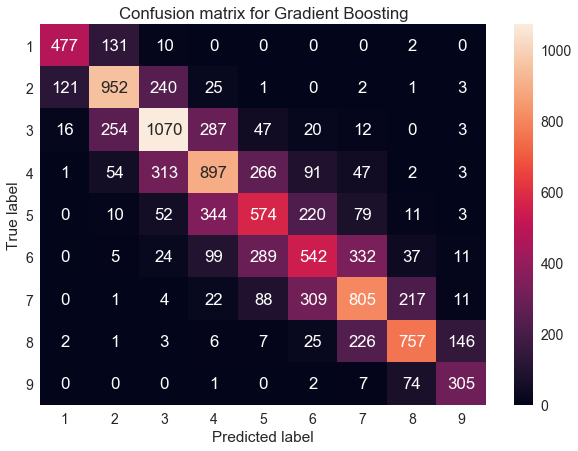

In [191]:
from sklearn.metrics import classification_report, confusion_matrix
classifier = GradientBoostingClassifier(n_estimators=40, learning_rate = 0.5, max_features=2, max_depth = 8, random_state = 7)
classifier.fit(Smote_train_X, Smote_train_y)  

y_pred = classifier.predict(X_test) 
confusion_matrix = confusion_matrix(y_test, y_pred)

print_confusion_matrix(confusion_matrix, classname, "Gradient Boosting");
print(classification_report(y_test, y_pred))

Results are almost same as Random Forest with a slight increase in performance scores by around 2%. Both these models are over fitting the training data. An interesting fact in both these models is that the false predictions are mostly seen in immediate next price ranges.It can be inferred that the variance of the predictions from its true value is not very high and also the classes are closely related.

### IMPLEMENT DEEP LEARNING

In [271]:
df_keras.count()

brand                54995
odometres            54995
year                 54995
transmission_type    54995
number_cyl           54995
capacity_litres      54995
fuel_type            54995
price_range          54995
dtype: int64

In [272]:
df_keras.dtypes

brand                 object
odometres              int64
year                   int64
transmission_type     object
number_cyl           float64
capacity_litres      float64
fuel_type             object
price_range            int32
dtype: object

**Encoding the categorical columns**

In [206]:
lb = LabelEncoder() 
df_keras['brand'] = lb.fit_transform(df_keras['brand'] ) 
df_keras['transmission_type'] = lb.fit_transform(df_keras['transmission_type'] ) 
df_keras['fuel_type'] = lb.fit_transform(df_keras['fuel_type'] ) 

In [207]:
#Splitting X and y
X = df_keras.iloc[:,0:7] 
y = df_keras['price_range'] 

**Encoding the target variable to binary**

In [273]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

X_train=Smote_train_X
y_train=Smote_train_y

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [274]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [275]:
X_train.shape

(59886, 7)

**Create Deep Learning Model**

In [276]:
from keras.models import Sequential
from keras.layers import Dense


# Create a Neural Network model here


model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=7))
model.add(Dense(units=11, activation='relu'))
model.add(Dense(units=9, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_13 (Dense)             (None, 11)                143       
_________________________________________________________________
dense_14 (Dense)             (None, 9)                 108       
Total params: 347
Trainable params: 347
Non-trainable params: 0
_________________________________________________________________


In [277]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [278]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}") 
print(f"Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.0598982608971872
Accuracy: 0.5396854259586517


Clearly this model cannot be accepted. 

### CONCLUSION

| Model | CrossVal Score | CrossVal Standard Deviation | CrossVal Time in secs |  Precision score | Recall score | F1 score | Comments |
|---------|------------|----------|---------|------|------|------|
|Naive Bayes | 40.24% | 0.68 | 0.65 | NA | NA | NA | Model did not perform well after initial analysis, so was not considered for optimization |
|Optimized KNN | 58.52% | 0.83 | 19.21 | 28% | 25% | 24% | Model did not perform well |
|Optimized Random Forest | 62.17% | 3.9 | 31.99 | 56% | 56% | 56% | Model partially performed well |
|Optimized Gradient Boosting | 61.56 | 1.98 | 413.12 | 58% | 58% | 58% | Model partially performed well |

** Deep Learning**

| Model | Activation |Number of Dense Layers | Accuracy | Loss |
|----- |------|----- |------ |----- |
| Sequential | Relu & Softmax | 3 |55% |1.02 |

<br>
**Multiclass classification problem gets a bit tricky. None of the models performed good. Naive Bayes and Optimized KNN could not handle multiclass classification problem well. This may be due to the class bias for lower and higher price ranges. 
Optimized Random Forest and Gradient Boosting performed better than KNN and Naive Bayes and increased its scores by almost 30%. Predictions of lower price ranges 1-3 and higher price range 8-9 can be made with an accuracy of around 70% but it fails to predict mid range price estimation.<br>
One interesting fact that was observed in confusion matrices of Random Forest and Gradient Boosting is that the higher number of instances of false predictions occupied immediate next classes of true predictions forming a broader diagonal. This might be  because the classes, i.e, the price ranges are closely related and in such cases it gets harder to predict. Predictions got confused with immediate next classes**